In [1]:
import numpy as np
import pandas as pd
import os

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.initializers import HeUniform, GlorotUniform
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import cv2
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import GlobalAveragePooling2D, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import losses
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
import pathlib
data_dir = pathlib.Path("/brain")

train_dir = "Training"
test_dir = 'Testing'

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
batch_size = 32
img_height = 240
img_width = 240

In [11]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (img_height , img_width),
    batch_size= batch_size,
    class_mode = "categorical"
    )

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (img_height , img_width),
    batch_size = batch_size,
    class_mode = "categorical"
    )

print(r"Class Label :" , train_generator.class_indices)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.
Class Label : {'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}


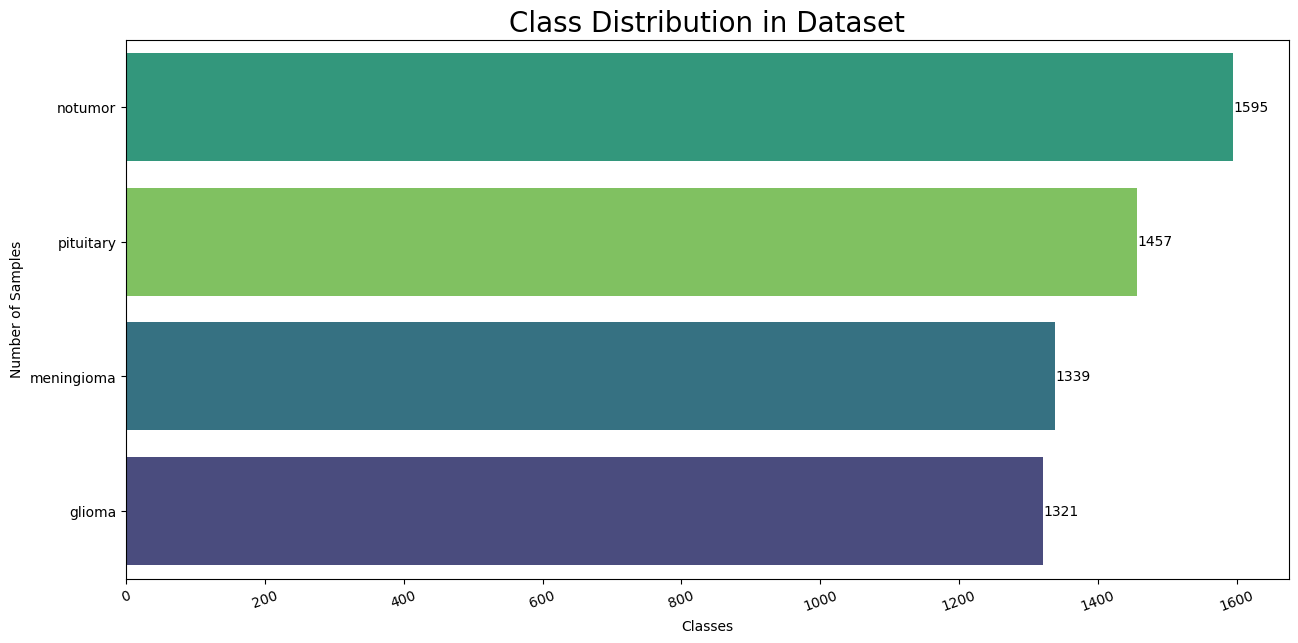

In [21]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

filepaths = train_generator.filepaths
labels = [path.split(os.sep)[-2] for path in filepaths]

train_df = pd.DataFrame({'Filepath': filepaths, 'Class': labels})

plt.figure(figsize=(15, 7))
ax = sns.countplot(data=train_df, y='Class', hue = 'Class', order=train_df['Class'].value_counts().index, palette='viridis')
     
plt.xlabel("Classes")
plt.ylabel("Number of Samples")
plt.title("Class Distribution in Dataset", fontsize=20)
plt.xticks(rotation=20)

for container in ax.containers:
    ax.bar_label(container)
plt.show()

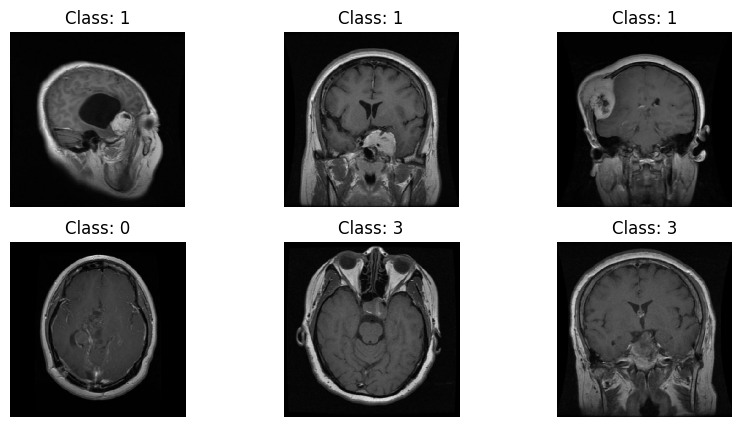

In [22]:
x_batch, y_batch = next(train_generator)  

plt.figure(figsize=(10, 5))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(x_batch[i])
    plt.title(f"Class: {np.argmax(y_batch[i])}") 
    plt.axis("off")
plt.show()

In [23]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,          
    width_shift_range=0.2,     
    height_shift_range=0.2,    
    shear_range=0.2,           
    zoom_range=0.2,             
    horizontal_flip=True,       
    fill_mode='nearest'       
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [24]:
model = Sequential([
    Conv2D(32 , (5,5) , activation="relu" ,padding="valid", kernel_initializer=HeUniform()),
    MaxPooling2D(2,2),
    BatchNormalization(),

    Conv2D(64 , (5,5) , activation="relu" ,padding="valid", kernel_initializer=HeUniform()),
    MaxPooling2D(2,2),
    BatchNormalization(),

    Conv2D(128 , (5,5) , activation="relu" ,padding="valid", kernel_initializer=HeUniform()),
    MaxPooling2D(2,2),
    BatchNormalization(),

    Flatten(),

    Dense(64 , activation="relu" , kernel_initializer=HeUniform()),
    Dropout(0.2),
    BatchNormalization(),
    Dense(128 , activation="relu" , kernel_initializer=HeUniform()),
    Dropout(0.2),
    BatchNormalization(),
    Dense(256 , activation="relu" , kernel_initializer=HeUniform()),
    Dropout(0.3),
    BatchNormalization(),

    Dense(4 , activation="softmax" , kernel_initializer=GlorotUniform()),
    ])

In [26]:
model.compile(optimizer=Adam(learning_rate=0.0001) , loss="categorical_crossentropy", metrics=["accuracy"])

In [27]:
early_stop = EarlyStopping(patience=3,monitor="val_loss", restore_best_weights=True)

fit = model.fit(train_generator,epochs=10 , validation_data=(test_generator) , callbacks=[early_stop])

C:\Users\anuol\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 579s 3s/step - accuracy: 0.5368 - loss: 1.1754 - val_accuracy: 0.5706 - val_loss: 1.0233
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 592s 3s/step - accuracy: 0.7656 - loss: 0.6304 - val_accuracy: 0.6476 - val_loss: 0.9543
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 527s 3s/step - accuracy: 0.8264 - loss: 0.4840 - val_accuracy: 0.8406 - val_loss: 0.4025
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 529s 3s/step - accuracy: 0.8858 - loss: 0.3121 - val_accuracy: 0.9130 - val_loss: 0.2375
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 651s 3s/step - accuracy: 0.9209 - loss: 0.2208 - val_accuracy: 0.9314 - val_loss: 0.1881
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 695s 4s/step - accuracy: 0.9319 - loss: 0.1963 - val_accuracy: 0.8703 - val_loss: 0.3856
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 682s 4s/step - accuracy: 0.9520 - loss: 0.1555 - val_accuracy: 0.9413 - val_loss: 0.1651
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 623s 3s/step - accuracy: 0.9559 - loss: 0.1272 - val_accu

In [28]:
x_test, y_test = next(test_generator)  

predictions = model.predict(x_test)

predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)


print("Accuracy:", accuracy_score(true_classes, predicted_classes))
print("Classification Report:")
print(classification_report(true_classes, predicted_classes))
print("Confusion Matrix:")
print(confusion_matrix(true_classes, predicted_classes))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Accuracy: 0.9375
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.90      0.90      0.90        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         7

    accuracy                           0.94        32
   macro avg       0.93      0.93      0.93        32
weighted avg       0.94      0.94      0.94        32

Confusion Matrix:
[[ 4  1  0  0]
 [ 1  9  0  0]
 [ 0  0 10  0]
 [ 0  0  0  7]]
